# Flight Price Prediction

In [23]:
from IPython.display import Image
Image(url= "https://www.outlookindia.com/outlooktraveller/resizer.php?src=https://www.outlookindia.com/outlooktraveller/public/uploads/articles/travelnews/Main_10.jpg&w=1366&h=500")

### 1. Introduction
##### The tourism industry is changing fast and this is attracting a lot more travelers each year. The airline industry is considered as one of the most sophisticated industry in using complex pricing strategies. Now-a-days flight prices are quite unpredictable. The ticket prices change frequently. Customers are seeking to get the lowest price for their ticket, while airline companies are trying to keep their overall revenue as high as possible. Using technology it is actually possible to reduce the uncertainty of flight prices. So here we will be predicting the flight prices using efficient machine learning techniques.

### 2. Importing All Necessary libraries

In [119]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import zscore

# preprocession, normalizing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

# for multicollinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor

#n for models
from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import Lasso, LassoCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

import warnings
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


##### By Importing above All Necessary Libraries I got the idea of implementing all the Libraries in one go for better model Prediction in this dataset.

### 3. Loading excel data

In [120]:
df = pd.read_excel('flight.xlsx')
df.head()

,Flight_name,Depart,Departure_Time,Destination,Arrival_Time,Duration,Total_stops,Price
0,Air Asia,New Delhi,04:25:00,Mumbai,06:35:00,2h 10m,Non Stop,2456
1,Go First,New Delhi,07:00:00,Mumbai,09:10:00,2h 10m,Non Stop,2456
2,IndiGo,New Delhi,07:15:00,Mumbai,09:25:00,2h 10m,Non Stop,2456
3,Go First,New Delhi,08:00:00,Mumbai,10:10:00,2h 10m,Non Stop,2456
4,IndiGo,New Delhi,08:10:00,Mumbai,10:20:00,2h 10m,Non Stop,2456


##### Here I am loading the data set into a variable i.e. “df” and processing the first 5 rows.
##### After Reading the csv file I find out that Price is thelabel columns while remaning are the Features columns.

### 4. EDA - Exploratory Data Analysis

##### In statistics, exploratory data analysis is an approach of analyzing data sets to summarize their main characteristics, often using statistical graphics and other data visualization methods. A statistical model can be used or not, but primarily EDA is for seeing what the data can tell us beyond the formal modeling or hypothesis testing task.
##### EDA which focuses more narrowly on checking assumptions required for model fitting and hypothesis testing, and handling missing values and making transformations of variables as needed.

In [121]:
df.shape

(1470, 8)

##### By using shape I got 7752 rows and 25 columns.By using shape I got 1470 rows and 8 columns.

In [122]:
pd.set_option('display.max_rows',None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Flight_name     1470 non-null   object
 1   Depart          1470 non-null   object
 2   Departure_Time  1470 non-null   object
 3   Destination     1470 non-null   object
 4   Arrival_Time    1470 non-null   object
 5   Duration        1469 non-null   object
 6   Total_stops     1470 non-null   object
 7   Price           1470 non-null   int64 
dtypes: int64(1), object(7)
memory usage: 92.0+ KB


##### Also, most of the column are object in nature and Price is of int64 data type.

In [123]:
df.drop_duplicates(inplace = True)
df.shape

(1291, 8)

##### After using dupllicates I can see there is no duplicate value in this dataset.

In [124]:
df.nunique()

Flight_name         6
Depart              4
Departure_Time    220
Destination        10
Arrival_Time      225
Duration          302
Total_stops         9
Price             567
dtype: int64

##### By Using nunique I got an idea of continuous & Categorical Columns.
##### As in this Dataset most of the columns are continuous to predict Flight Price Prediction.

### 5. Data Visualizations

#### According to my perception I have done below Data visualization in this Project.
#### Strip Plot
##### A strip plot is a graphical data anlysis technique for summarizing a univariate data set.A strip chart is handy when taking a look at a small set of one-dimensional data. It shows all the data, and since there aren't too many points cluttering the plot, it is informative.A strip is basically a scatter plot where the x axis represents a categorical variable While Y represents Label Column of the Dataset.
#### Cat Plot
##### Catplot shows frequencies of the categories of one, two or three categorical variables.This function provides access to several axes-level functions that show the relationship between a numerical and one or more categorical variables using one of several visual representations.
#### Histogram Plot
##### To construct a histogram, the first step is to "bin" (or "bucket") the range of values—that is, divide the entire range of values into a series of intervals—and then count how many values fall into each interval. The bins are usually specified as consecutive, non-overlapping intervals of a variable.The bins (intervals) must be adjacent and are often (but not required to be) of equal size. If the bins are of equal size, a rectangle is erected over the bin with height proportional to the frequency—the number of cases in each bin. A histogram may also be normalized to display "relative" frequencies. It then shows the proportion of cases that fall into each of several categories, with the sum of the heights equaling 1.
#### Distribution Plot
##### A distribution plot displays a distribution and range of a set of numeric values plotted against a dimension. ... In a distribution chart, ideally, two dimensions and one measure are used. If so, you will get the individual line of range and distribution.

# Flight name

In [125]:
df['Flight_name'].value_counts()

IndiGo       341
Vistara      321
Air India    308
Go First     147
Air Asia      93
SpiceJet      81
Name: Flight_name, dtype: int64

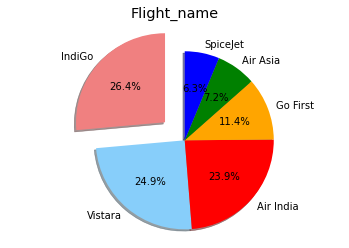

<Figure size 1080x720 with 0 Axes>

In [126]:
#  pie plot of Flight_name 

labels = ['IndiGo', 'Vistara', 'Air India', 'Go First', 'Air Asia', 'SpiceJet']
value = [341, 321, 308, 147, 93, 81]
colors = ['lightcoral','lightskyblue', 'red','orange','green', 'blue']
explode = [0.3,0,0,0,0,0,]# 

plt.style.use('ggplot')
plt.title('Flight_name')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize=(15,10))
plt.show()

<AxesSubplot:xlabel='Price', ylabel='Flight_name'>

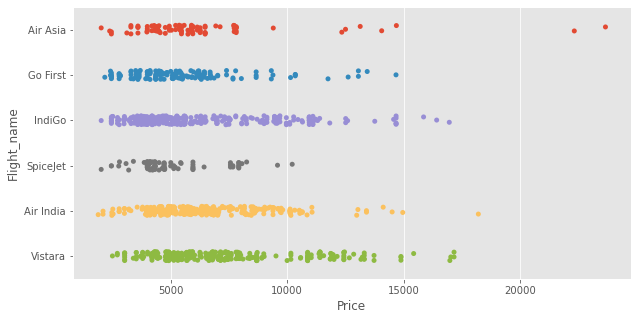

In [127]:
plt.figure(figsize=(10,5))
sns.stripplot(df['Price'],df['Flight_name'])

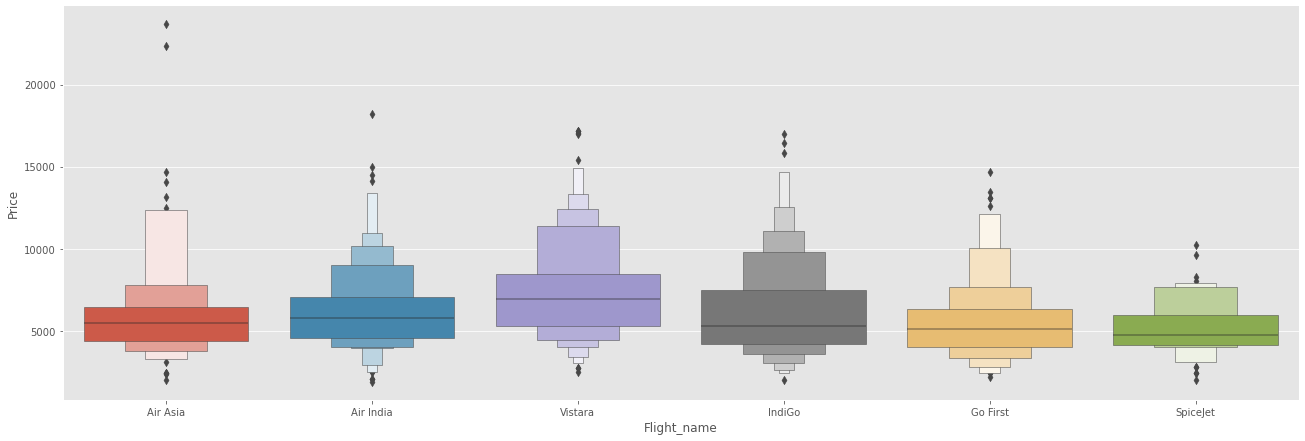

In [128]:
# Flight_name vs Price
sns.catplot(y = "Price", x = "Flight_name", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

##### From the above plots and charts I can see Indigo Airways flight prices are more higher rather than others in this dataset.

## Departure

In [129]:
df["Depart"].value_counts()

New Delhi    429
Bangalore    406
Mumbai       309
Kolkata      147
Name: Depart, dtype: int64

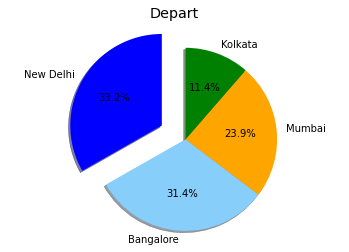

<Figure size 1080x720 with 0 Axes>

In [130]:
#  pie plot of Depart 

labels = ['New Delhi', 'Bangalore', 'Mumbai', 'Kolkata']
value = [429, 406, 309, 147]
colors = ['blue','lightskyblue','orange','green']
explode = [0.3,0,0,0]# 

plt.style.use('ggplot')
plt.title('Depart')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize=(15,10))
plt.show()

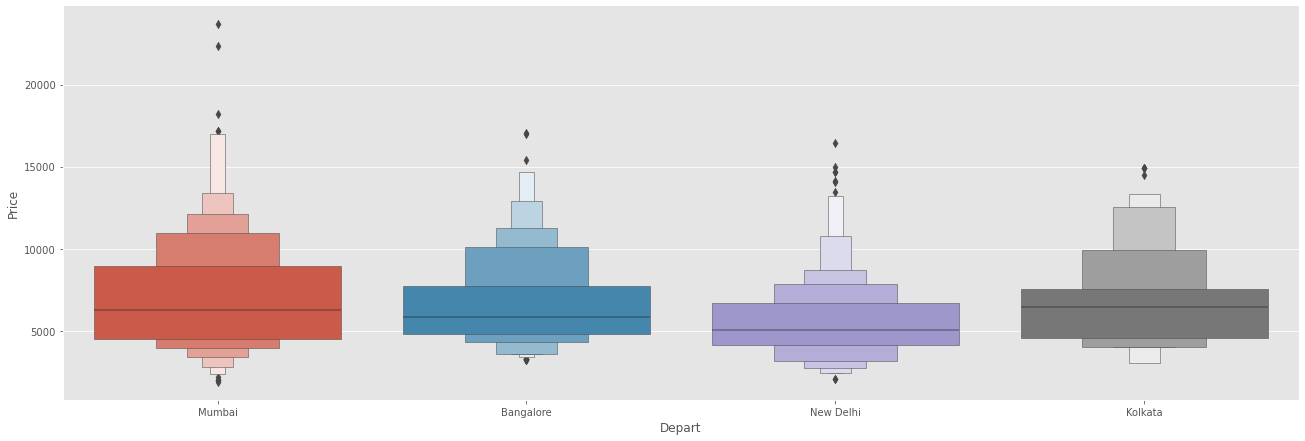

In [132]:
# Depart vs Price
sns.catplot(y = "Price", x = "Depart", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

##### From the above plots and charts I can see Mumbai flight prices are more higher rather than others in this dataset.

# Destination

In [15]:
df["Destination"].value_counts()

Goa           250
Mumbai        171
New Delhi     147
Kolkata       121
Hyderabad     113
Varanasi      109
Guwahati      106
Chandigarh     95
Lucknow        94
Jaipur         85
Name: Destination, dtype: int64

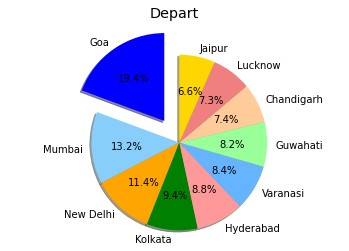

<Figure size 1080x720 with 0 Axes>

In [16]:
#  pie plot of Destination 

labels = ['Goa', 'Mumbai', 'New Delhi', 'Kolkata', 'Hyderabad', 'Varanasi', 'Guwahati', 'Chandigarh', 'Lucknow', 'Jaipur']
value = [250, 171, 147, 121, 113, 109, 106, 95, 94, 85]
colors = ['blue','lightskyblue','orange','green','#ff9999','#66b3ff','#99ff99','#ffcc99','lightcoral','gold']
explode = [0.3,0,0,0,0,0,0,0,0,0]# 

plt.style.use('ggplot')
plt.title('Depart')
plt.pie(x=value, labels=labels, colors=colors, explode=explode, autopct='%1.1f%%',
         startangle=90,shadow=True)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.figure(figsize=(15,10))
plt.show()

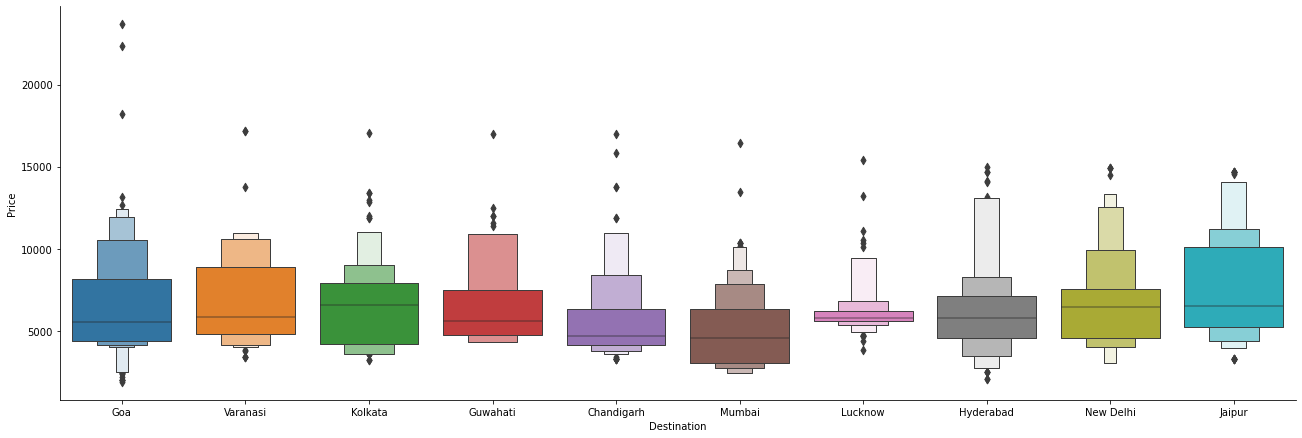

In [80]:
sns.catplot(y = "Price", x = "Destination", data = df.sort_values("Price", ascending = False), kind="boxen", height = 6, aspect = 3)
plt.show()

##### From the above plots and charts I can see Goa destination flight prices are more higher rather than others in this dataset.

## Total stops

In [17]:
df["Total_stops"].value_counts()

1 Stop       906
Non Stop     194
2 Stop(s)    118
2 Stop        38
3 Stop(s)     28
4 Stop(s)      3
3 Stop         2
4 Stop         1
5 Stop         1
Name: Total_stops, dtype: int64

<AxesSubplot:xlabel='Price', ylabel='Total_stops'>

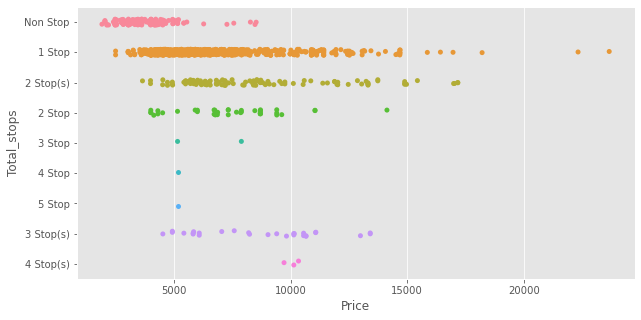

In [18]:
plt.figure(figsize=(10,5))
sns.stripplot(df['Price'],df['Total_stops'])

<AxesSubplot:xlabel='Total_stops', ylabel='Price'>

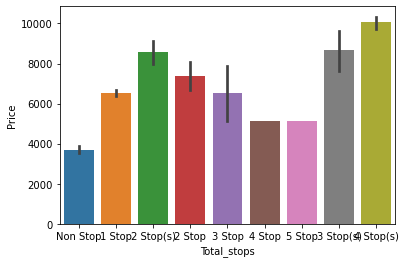

In [82]:
sns.barplot(df['Total_stops'],df['Price'])

#### Basically in this dataset mainly it shows from charts & plots that  1 stops flights are basiccaaly used.

# Label Encoder

#### Label Encoding refers to converting the labels into a numeric form so as to convert them into the machine-readable form. Machine learning algorithms can then decide in a better way how those labels must be operated. It is an important pre-processing step for the structured dataset in supervised learning.

In [73]:
le = LabelEncoder()
df.Flight_name = le.fit_transform(df.Flight_name)
df.Depart = le.fit_transform(df.Depart)
df.Departure_Time = le.fit_transform(df.Departure_Time)
df.Destination = le.fit_transform(df.Destination)
df.Arrival_Time = le.fit_transform(df.Arrival_Time)
df.Duration = le.fit_transform(df.Duration)
df.Total_stops = le.fit_transform(df.Total_stops)

In [74]:
df.describe()

,Flight_name,Depart,Departure_Time,Destination,Arrival_Time,Duration,Total_stops,Price
count,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000
mean,2.752905,1.589466,106.068164,4.387297,122.204493,174.089853,1.529047,6364.553834
std,1.647685,1.239660,60.610665,2.950017,59.460586,96.571753,2.860539,2772.914216
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1890.000000
25%,1.000000,0.000000,50.000000,1.000000,79.500000,82.500000,0.000000,4384.500000
50%,3.000000,2.000000,96.000000,4.000000,121.000000,205.000000,0.000000,5702.000000
75%,4.000000,3.000000,160.500000,7.000000,173.000000,261.000000,2.000000,7506.000000
max,5.000000,3.000000,219.000000,9.000000,224.000000,302.000000,8.000000,23672.000000


#### Total number of counts in each columns is matching as there is no missing values.
#### The difference between the mean and 50% is not much.
#### There are outlires in the dataset which i will remove it soon.

# Histogram plot

array([[<AxesSubplot:title={'center':'Flight_name'}>,
        <AxesSubplot:title={'center':'Depart'}>,
        <AxesSubplot:title={'center':'Departure_Time'}>,
        <AxesSubplot:title={'center':'Destination'}>],
       [<AxesSubplot:title={'center':'Arrival_Time'}>,
        <AxesSubplot:title={'center':'Duration'}>,
        <AxesSubplot:title={'center':'Total_stops'}>,
        <AxesSubplot:title={'center':'Price'}>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>],
       [<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>]],
      dtype=object)

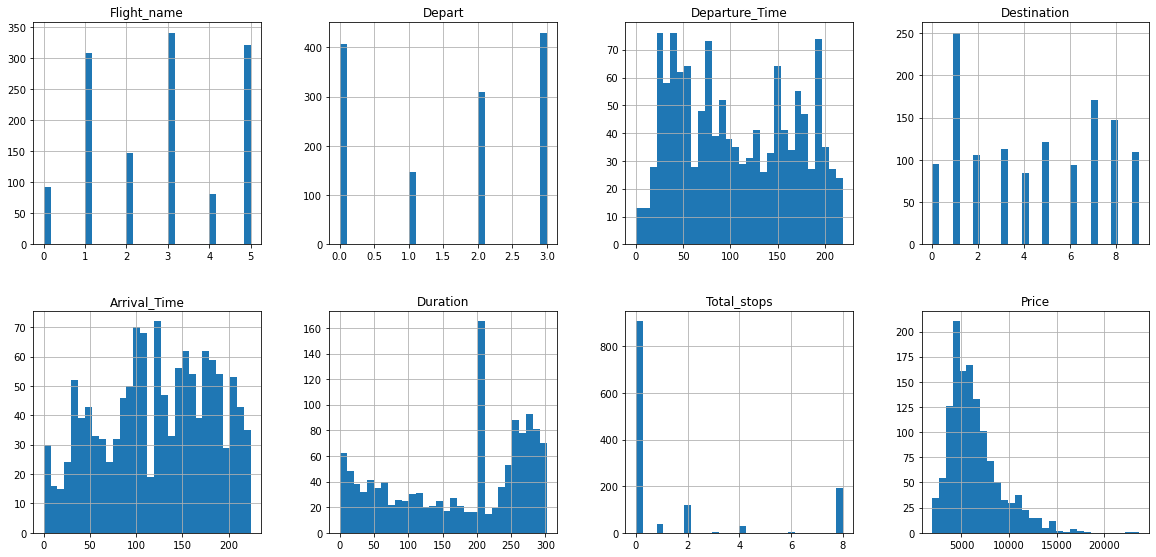

In [75]:
# using the the histogrom plot 

df.hist(figsize=(20,20),grid=True,layout=(4,4),bins=30)

#### By making Histogram Plot I can see there are some skewness in this dataset.
#### From plotting this histogram, I used the bin size as 30, we can take any bin size (suited as per as data).

## Distribution plot

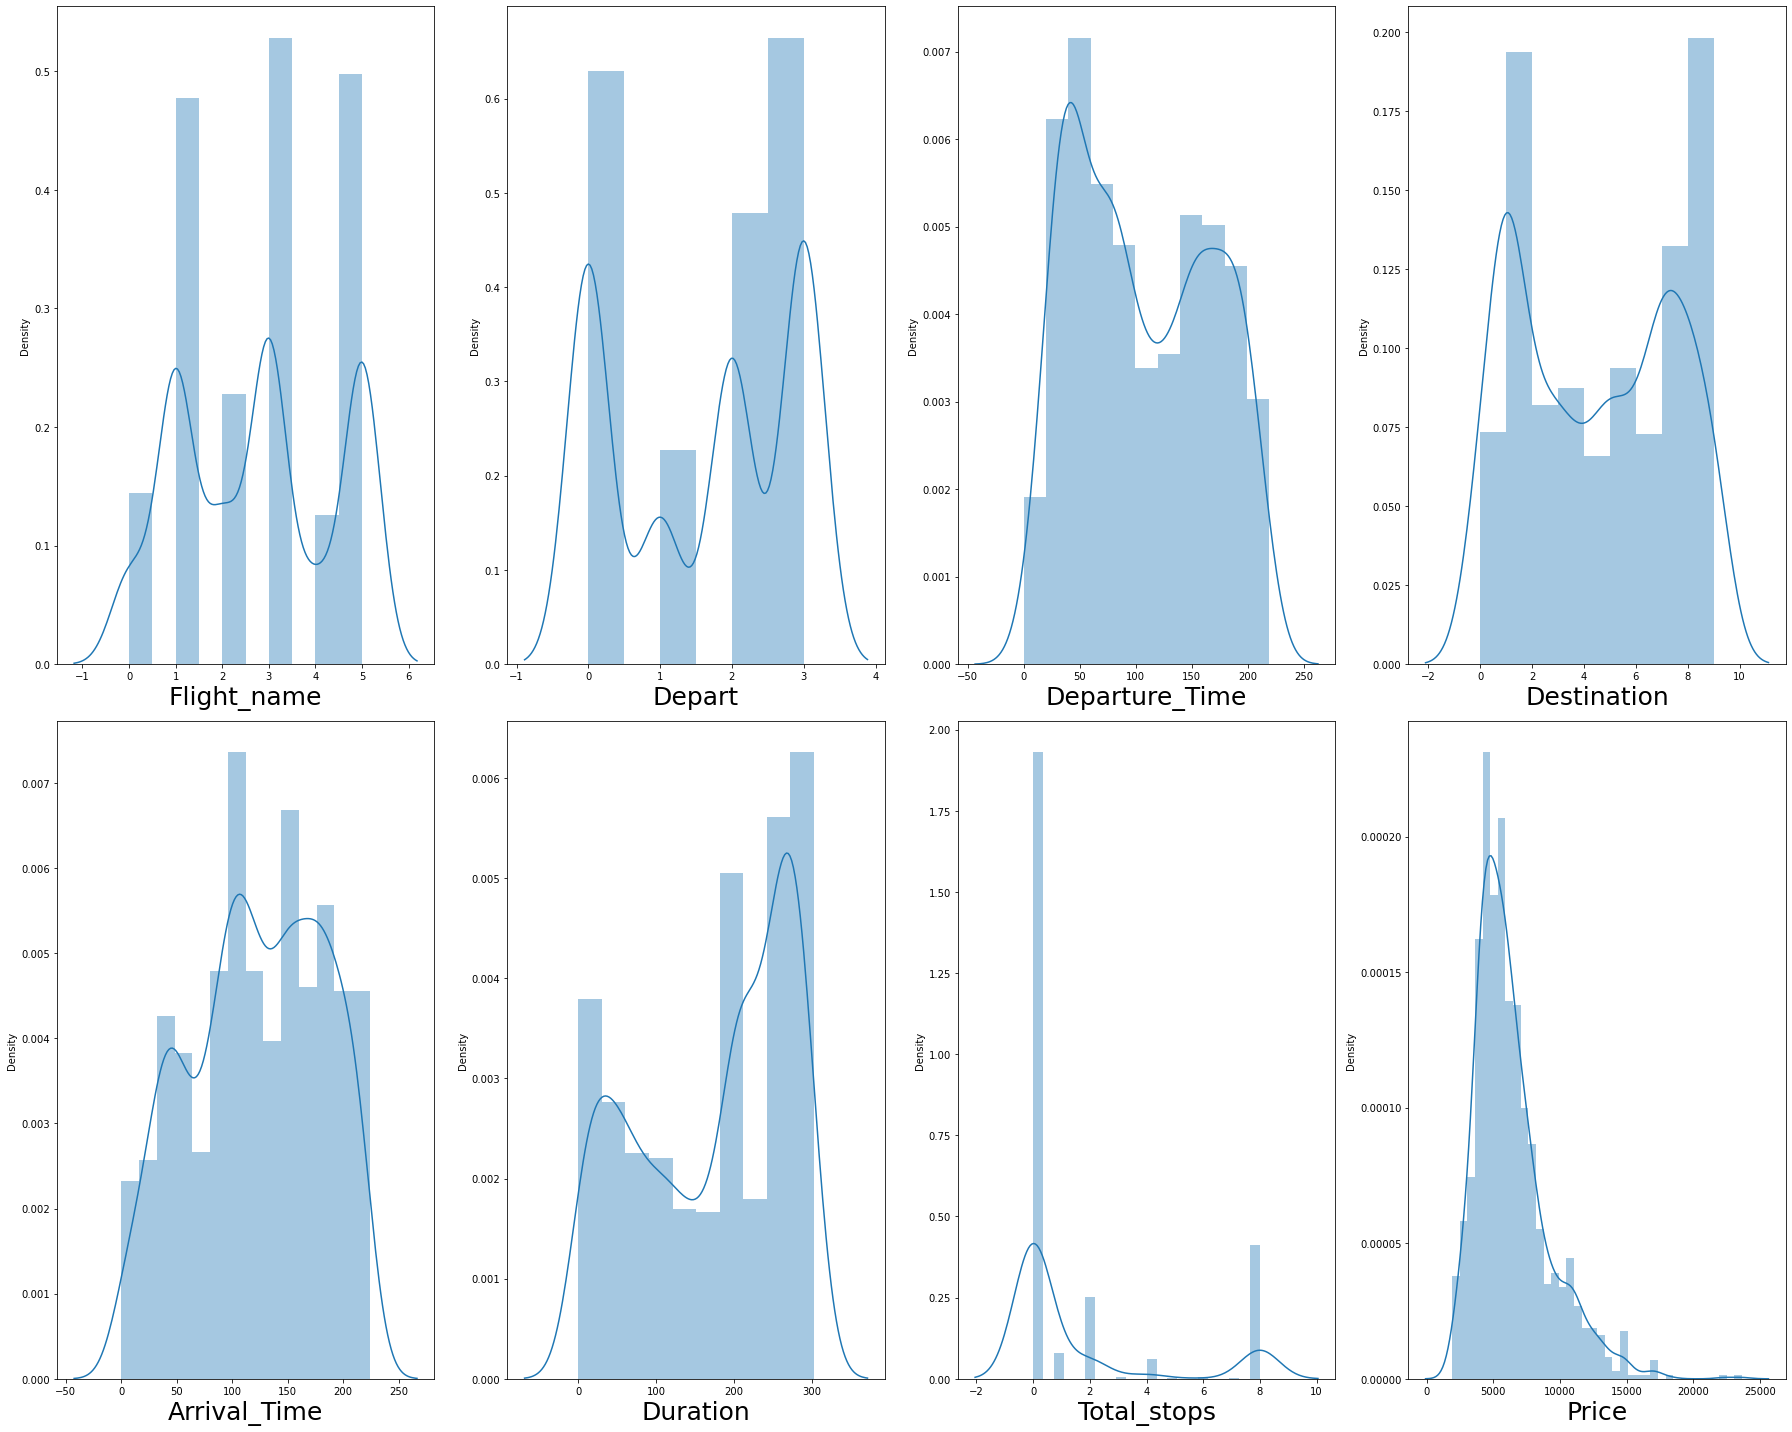

In [76]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

##### From the above Distribution Plot I can see that there are skewness in this dataset.

# Replacing all the zero values from different columns

In [77]:
# Replacing continous columns with mean
df['Departure_Time']=df['Departure_Time'].replace(0,df['Departure_Time'].mean())
df['Arrival_Time']=df['Arrival_Time'].replace(0,df['Arrival_Time'].mean())
df['Duration']=df['Duration'].replace(0,df['Duration'].mean())
df['Flight_name']=df['Flight_name'].replace(0,df['Flight_name'].mean())
df['Depart']=df['Depart'].replace(0,df['Depart'].mean())
df['Destination']=df['Destination'].replace(0,df['Destination'].mean())
df['Total_stops']=df['Total_stops'].replace(0,df['Total_stops'].mean())

#### There are few zero values in the above cloumns that is replaced with mean.

In [78]:
df.describe()

,Flight_name,Depart,Departure_Time,Destination,Arrival_Time,Duration,Total_stops,Price
count,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000,1291.000000
mean,2.951216,2.089328,106.150324,4.710142,122.393810,175.303492,2.602104,6364.553834
std,1.459161,0.701120,60.538621,2.679696,59.265268,95.462995,2.321274,2772.914216
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1890.000000
25%,2.000000,1.589466,50.500000,2.000000,80.000000,87.000000,1.529047,4384.500000
50%,3.000000,2.000000,96.000000,4.387297,121.000000,205.000000,1.529047,5702.000000
75%,4.000000,3.000000,160.500000,7.000000,173.000000,261.000000,2.000000,7506.000000
max,5.000000,3.000000,219.000000,9.000000,224.000000,302.000000,8.000000,23672.000000


##### After replacing zero values now it is better to use Box plot to understand about outliers.

## Box Plot

Flight_name          AxesSubplot(0.125,0.536818;0.168478x0.343182)
Depart            AxesSubplot(0.327174,0.536818;0.168478x0.343182)
Departure_Time    AxesSubplot(0.529348,0.536818;0.168478x0.343182)
Destination       AxesSubplot(0.731522,0.536818;0.168478x0.343182)
Arrival_Time            AxesSubplot(0.125,0.125;0.168478x0.343182)
Duration             AxesSubplot(0.327174,0.125;0.168478x0.343182)
Total_stops          AxesSubplot(0.529348,0.125;0.168478x0.343182)
Price                AxesSubplot(0.731522,0.125;0.168478x0.343182)
dtype: object

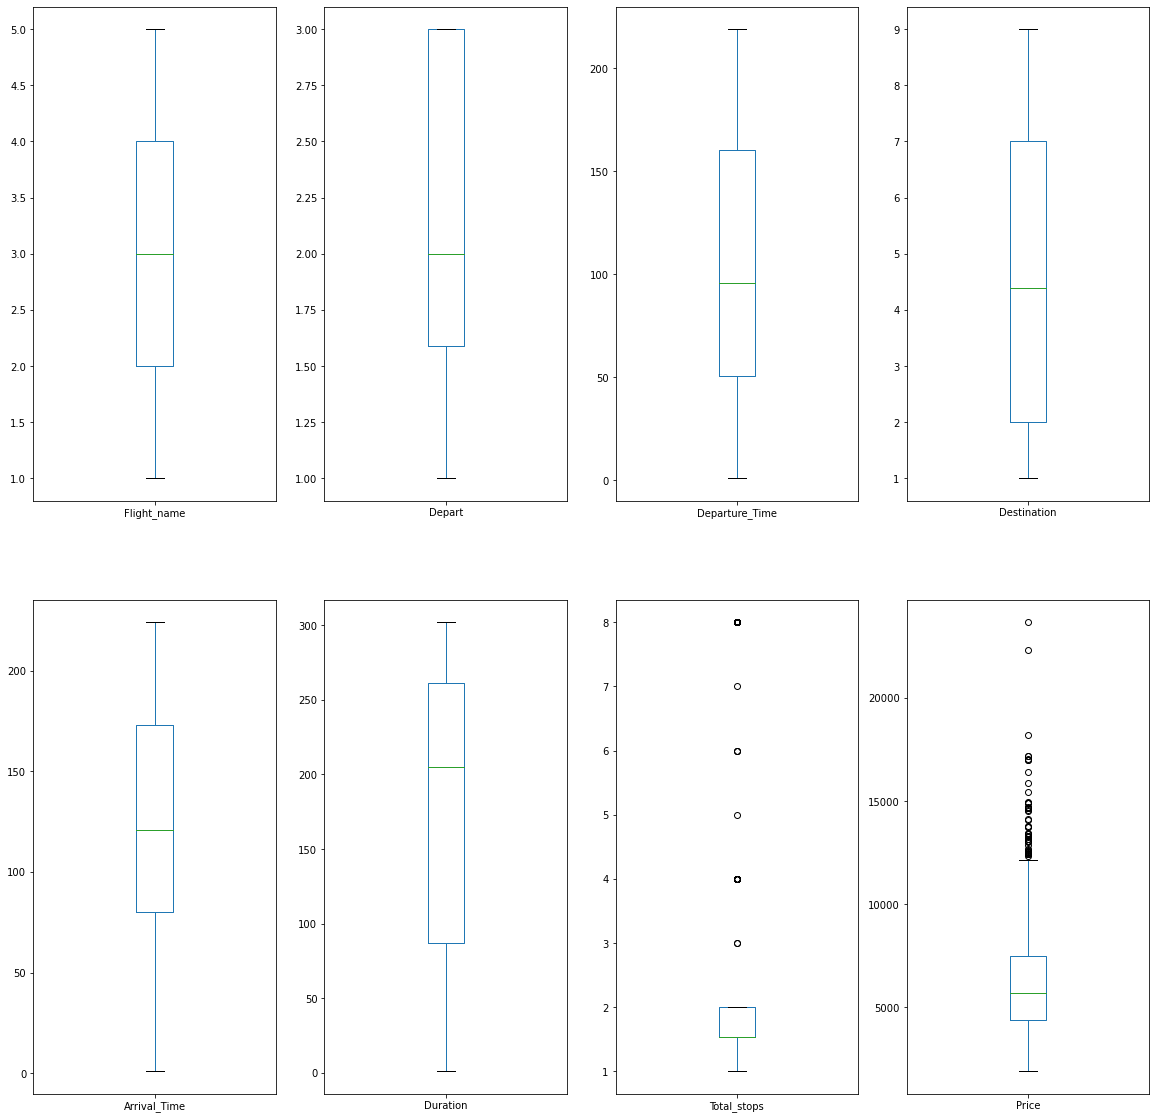

In [79]:
df.plot(kind='box',subplots=True,layout=(2,4),figsize=(20,20))

##### From above image I can clear see that there are few number of black dots in the column which are referring to the outliers, so it means most of the data are outside the distribution.
##### So now I detect the outliers now the second step is to remove the outliers, there are different way to remove the outliers that are zscore values.
##### There are outliers in Price which is continous in nature.

# Z score

In [80]:
z_score = zscore(df[['Price']])
abs_z_score = np.abs(z_score)

filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.describe()

,Flight_name,Depart,Departure_Time,Destination,Arrival_Time,Duration,Total_stops,Price
count,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000,1270.000000
mean,2.941544,2.093392,105.992967,4.709463,122.469613,175.080952,2.616510,6198.135433
std,1.460042,0.702355,60.506680,2.682240,59.319798,95.348344,2.337480,2452.893487
min,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1890.000000
25%,2.000000,1.589466,50.000000,2.000000,80.000000,87.000000,1.529047,4373.000000
50%,3.000000,2.000000,96.000000,4.387297,122.000000,205.000000,1.529047,5681.500000
75%,4.000000,3.000000,160.750000,7.000000,173.000000,261.000000,2.000000,7457.000000
max,5.000000,3.000000,219.000000,9.000000,224.000000,302.000000,8.000000,14678.000000


In [81]:
df.shape

(1270, 8)

#### I am using zscore value then I again check if there are some of the outliers then I will remove it by replacing the outliers with the mean value of that column.
#### So, I first find the zscore value and then I decide to make one threshold value as 3 which is standard of industry recommend value and then I remove all the outliers which zscore value is greater than 3.
#### After, removing the outlier’s final there are 1270 and 8 column presents in the data set.

# After Removing Skewness making Distribution Plot

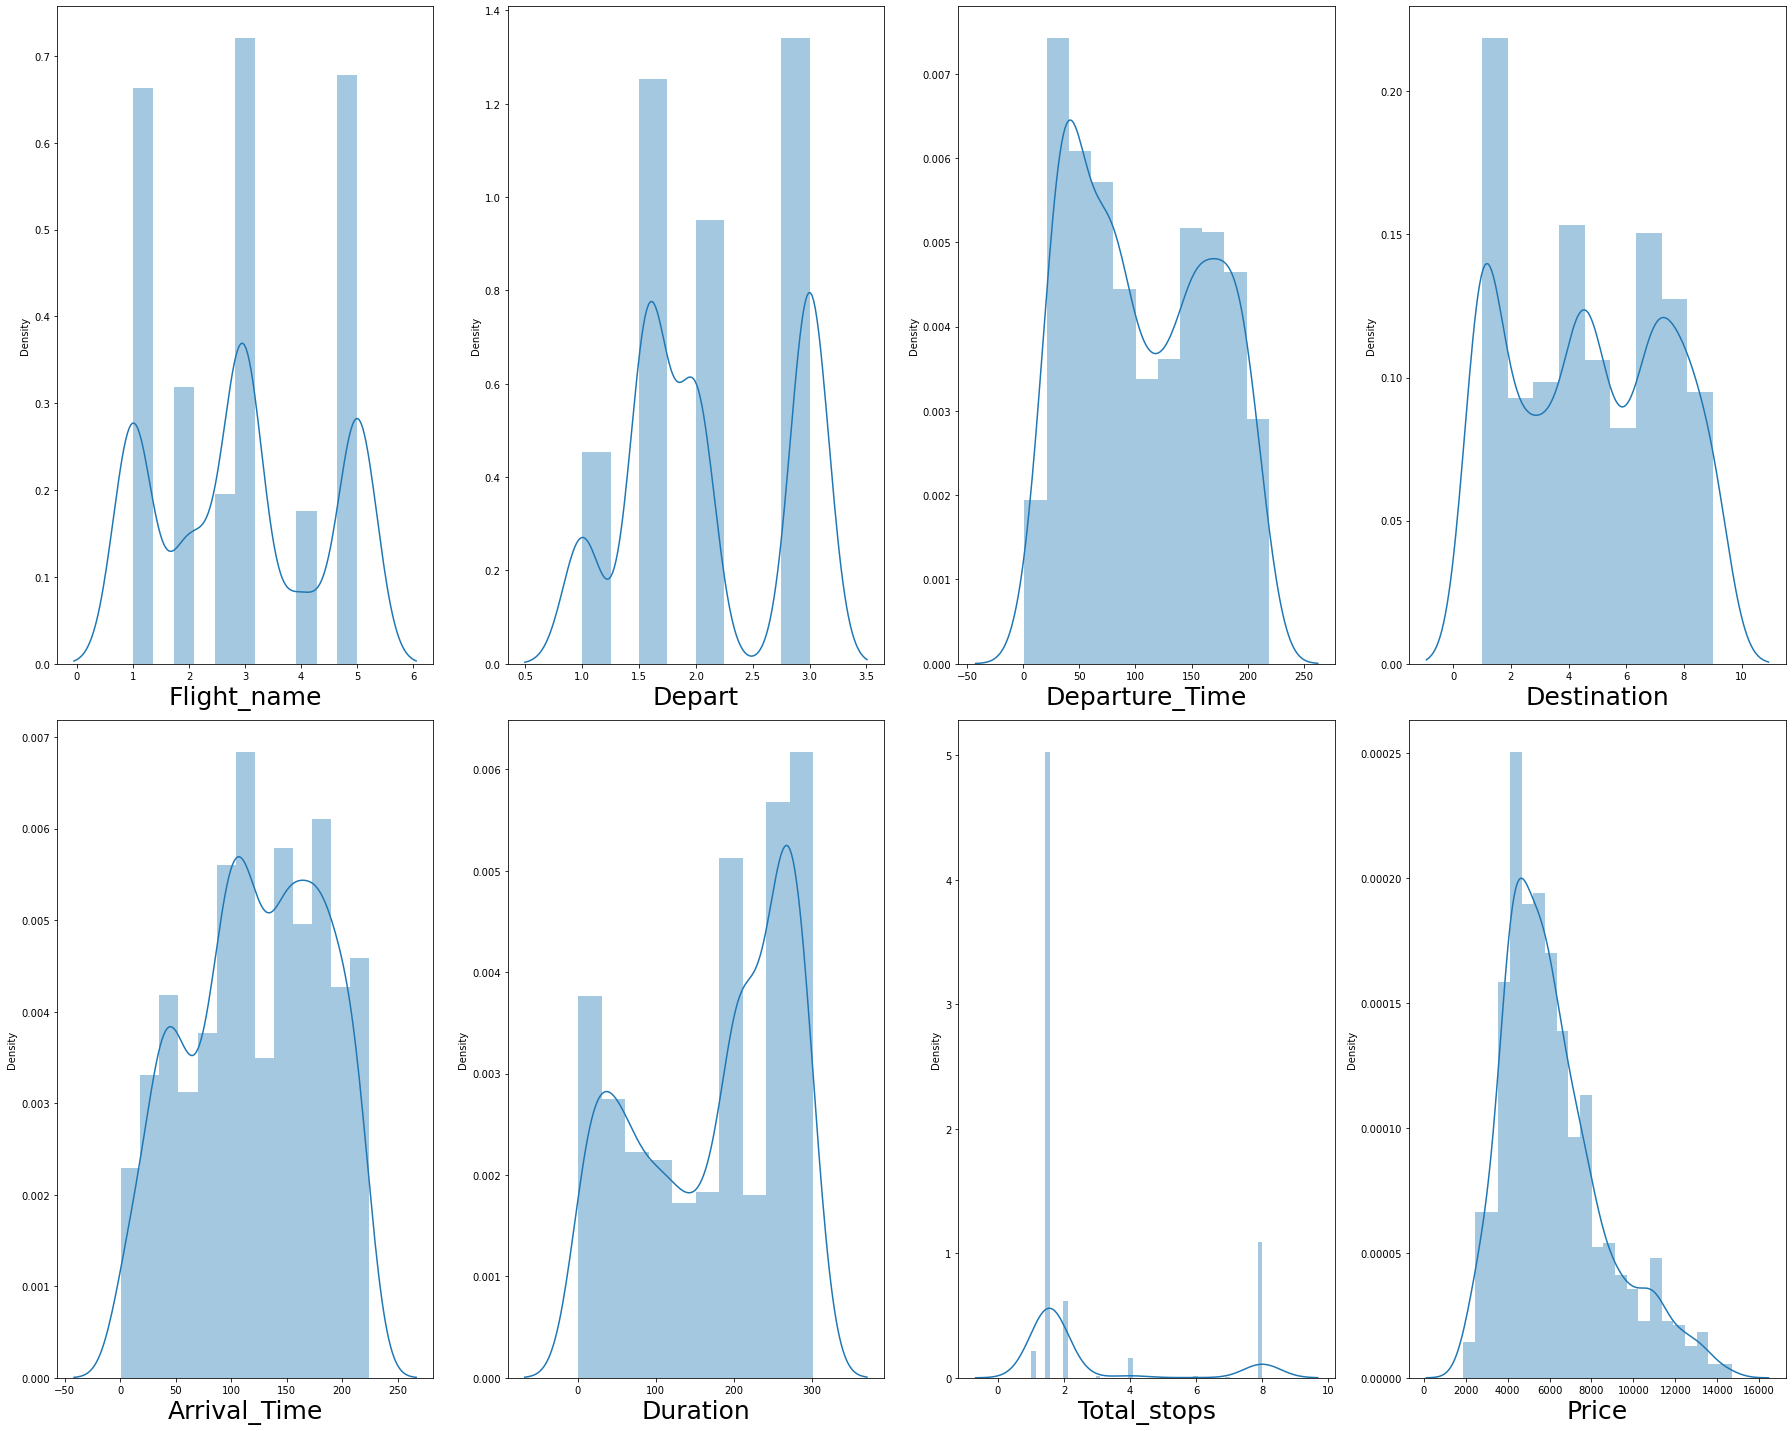

In [82]:
# using the the distribution plot 

plt.figure(figsize=(25,20), facecolor='white')
plotnumber = 1

for column in df:
    if plotnumber<=8:
        ax=plt.subplot(2,4,plotnumber)
        sns.distplot(df[column])
        plt.xlabel(column,fontsize=25)
    plotnumber+=1
plt.tight_layout() 

#### Hence After Rmoving Outliers I make distribution plot which shows few outliers are removed.

# Finding correlation of features vs target using corrwith

## Visualize the correlation

In [83]:
df.drop('Price',axis=1).corrwith(df.Price)

Flight_name       0.144687
Depart           -0.188614
Departure_Time   -0.018130
Destination      -0.044378
Arrival_Time      0.100747
Duration         -0.068562
Total_stops      -0.392638
dtype: float64

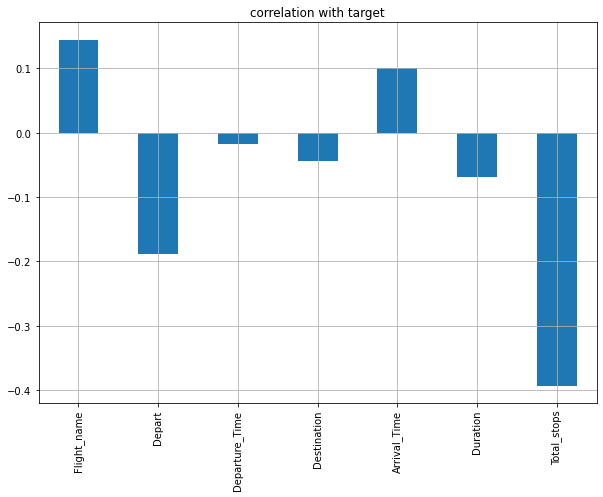

In [84]:
df.drop('Price',axis=1).corrwith(df.Price).plot(kind='bar',grid=True,figsize=(10,7),title="correlation with target")
plt.show()

#### I have checked the relationship between label and different features.
#### Most of the features are in minus value only 2 columns are positively related to target value.

# Correlation

In [85]:
df.corr()

,Flight_name,Depart,Departure_Time,Destination,Arrival_Time,Duration,Total_stops,Price
Flight_name,1.000000,0.067232,0.040470,0.012505,0.043391,0.011309,-0.017594,0.144687
Depart,0.067232,1.000000,0.052485,-0.307681,0.001646,0.059399,0.074671,-0.188614
Departure_Time,0.040470,0.052485,1.000000,-0.060227,-0.126224,-0.157605,0.041290,-0.018130
Destination,0.012505,-0.307681,-0.060227,1.000000,0.056837,-0.030699,0.013371,-0.044378
Arrival_Time,0.043391,0.001646,-0.126224,0.056837,1.000000,0.010506,-0.041737,0.100747
Duration,0.011309,0.059399,-0.157605,-0.030699,0.010506,1.000000,0.092292,-0.068562
Total_stops,-0.017594,0.074671,0.041290,0.013371,-0.041737,0.092292,1.000000,-0.392638
Price,0.144687,-0.188614,-0.018130,-0.044378,0.100747,-0.068562,-0.392638,1.000000


#### Now I am finding the correlation value of each column, this value is categorized into mainly 2 parts that are:
#### Positive correlated value
#### Negative correlated value The most the value is positive means that column is much co related and vice versa.

# Heatmap

##### I am using seaborn heatmap to plot the correlated matrix and plot the corr value in the heatmap graph

[]

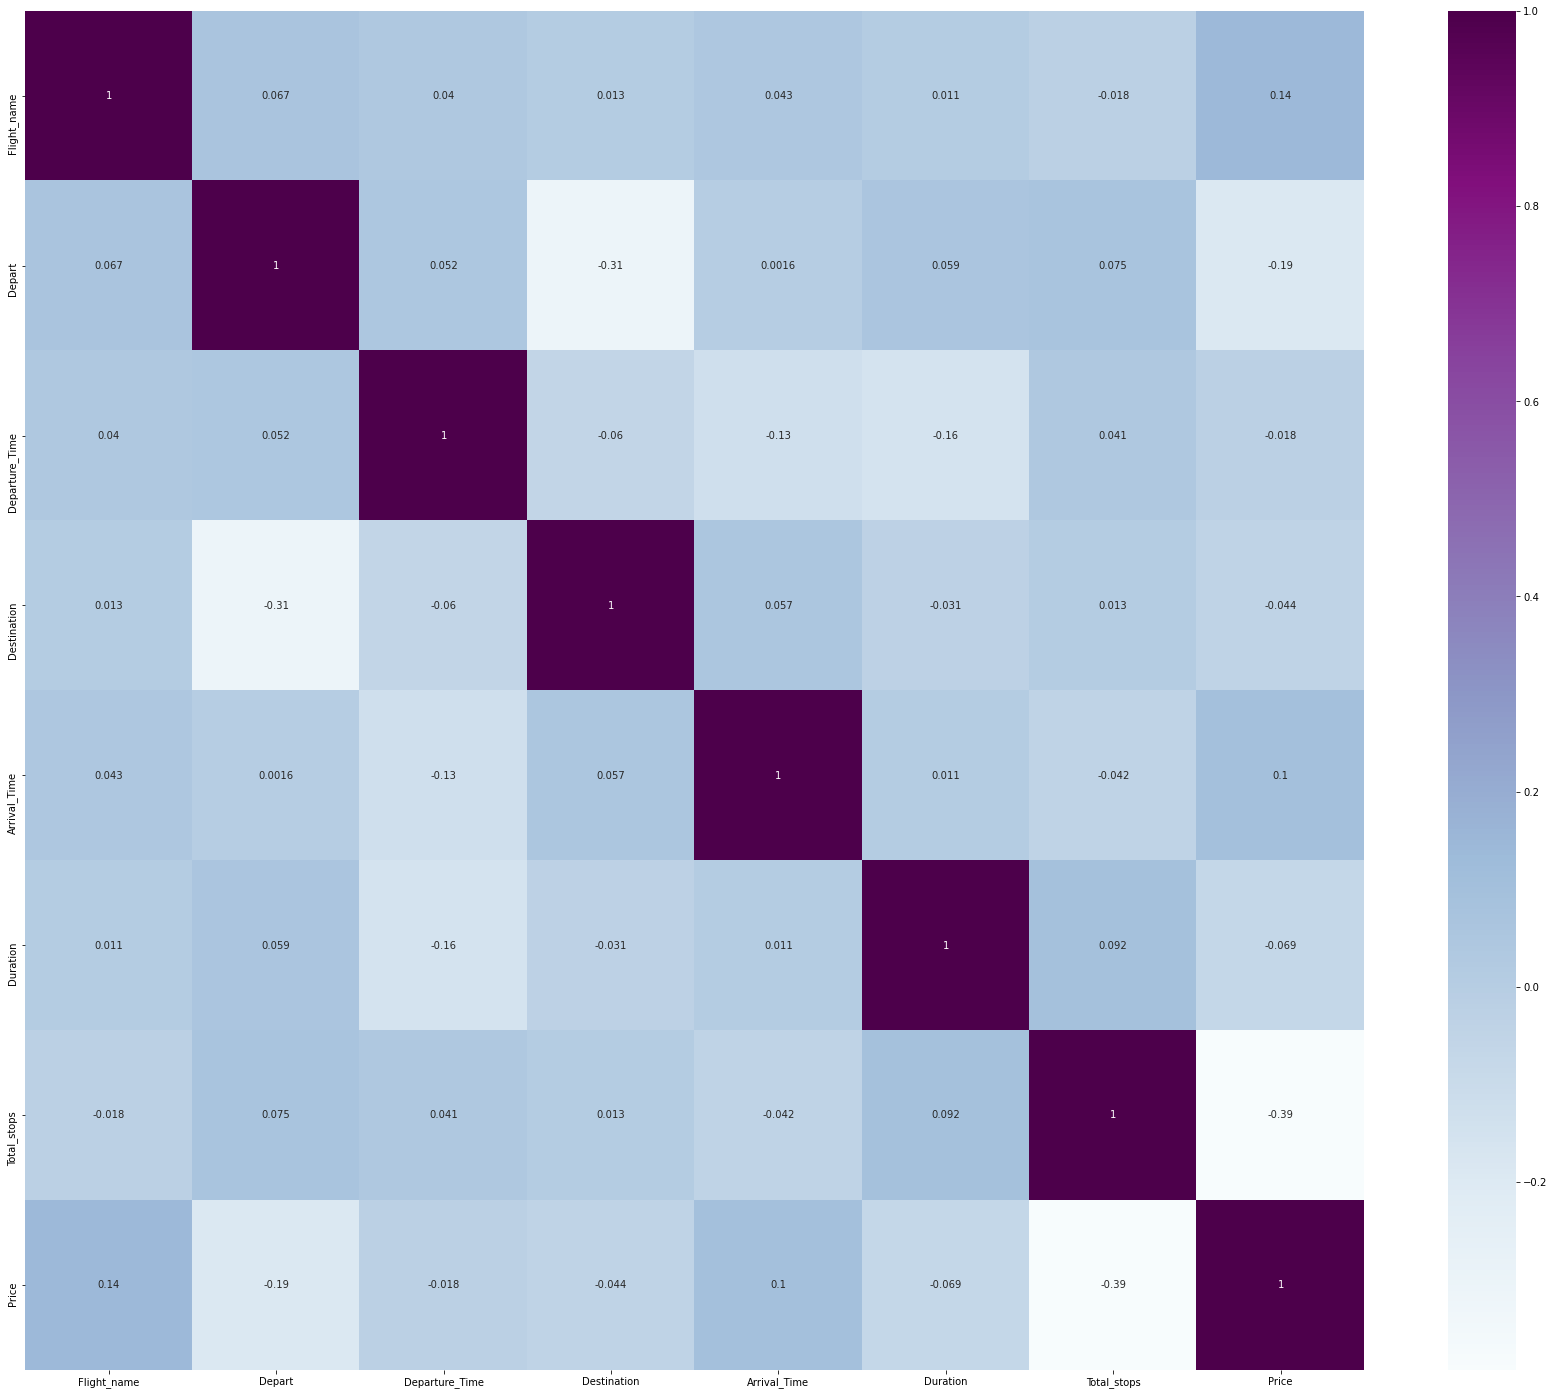

In [86]:
#checking the co-relation of all column to each other
df_cor = df.corr()
plt.figure(figsize=(30,25))
sns.heatmap(df_cor,annot=True,cmap='BuPu')
plt.plot()

## Machine Learning

In [87]:
x = df.drop('Price',axis=1)
y = df.Price

##### Dividing features and label into x and y for model prediction.

## StandardScaler

In [88]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled

array([[-0.12925247,  1.29132024, -1.57057681, ..., -1.54258189,
         0.30341839,  2.30402419],
       [-0.64512901,  1.29132024, -1.09110208, ..., -1.07037816,
         0.30341839,  2.30402419],
       [ 0.04005269,  1.29132024, -1.04150125, ..., -1.0197849 ,
         0.30341839,  2.30402419],
       ...,
       [ 1.41041608, -1.55736323, -0.47935845, ...,  0.27877537,
         0.40833829, -0.26385394],
       [ 1.41041608, -1.55736323, -0.47935845, ...,  0.91962329,
         0.48178223, -0.26385394],
       [-1.3303107 , -1.55736323, -1.38870709, ..., -0.07537743,
         1.21622157, -0.46541215]])

##### Applying the standard scaler to scaled the dataset in one range.

## VIF - variance inflation factor

In [89]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x_scaled,i) for i in range (x_scaled.shape[1])]
vif["Features"] = x.columns
vif

,vif,Features
0,1.010344,Flight_name
1,1.123170,Depart
2,1.053028,Departure_Time
3,1.114361,Destination
4,1.023120,Arrival_Time
5,1.040807,Duration
6,1.020364,Total_stops


##### None of the features vif score value is above 5. So i can say that Multicollinearity doesn't exist.

## Model Building

#### A machine learning model is built by learning and generalizing from training data, then applying that acquired knowledge to new data it has never seen before to make predictions and fulfill its purpose. Lack of data will prevent you from building the model, and access to data isn't enough.
#### So in this dataset while predicting Price label first, I have used these Algorithmns for Model Building:
###### a)Random Forest Regressor Model
###### b)Decision Tree Regressor Model

#### Train Test Split

In [90]:
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.25,random_state = 370)

##### Using the train test split to divide the datset into training and testing dataset.

## DecisionTreeRegressor

#### Decision tree builds regression in the form of a tree structure. It breaks down a dataset into smaller and smaller subsets while at the same time an associated decision tree is incrementally developed. The final result is a tree with decision nodes and leaf nodes.

In [91]:
dt = DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [92]:
# adjusted r2 score
dt.score(x_train,y_train)

0.995124743789823

In [93]:
dt.score(x_test,y_test)

0.07607341885337271

In [94]:
y_pred = dt.predict(x_test)
y_pred

array([ 4326. ,  3631. ,  3211. , 10002. ,  4056. ,  4888. ,  4564. ,
        4294. ,  5026. ,  6718. , 11109. ,  5535. ,  6117. ,  5744. ,
       12149. ,  4500. ,  3211. ,  5690. ,  4326. ,  6988. ,  6448. ,
        3988. ,  7142. ,  3597. ,  7142. ,  8848. ,  4208. ,  5856. ,
        5838. ,  5474. ,  5609. ,  3994. ,  7314. ,  5838. ,  2456. ,
        4836. ,  2720. , 11572. ,  9191. ,  7013. ,  3930. ,  3597. ,
        9000. ,  9970. ,  4200. ,  5168. ,  4238. ,  5896. ,  4919. ,
       10883. ,  6448. ,  5583. ,  6173.5,  4194. ,  4116. ,  5408. ,
        8265. ,  4945. ,  6464. ,  4723. , 11066. ,  4238. ,  5408. ,
        6718. ,  5807. ,  7315. ,  4412. ,  6258. ,  6068. ,  8358. ,
        2456. ,  7142. ,  5574. , 13766. ,  4002. ,  5007. ,  7845. ,
        7877. ,  4448. ,  5806. ,  2476. ,  9576. ,  5807. ,  5702. ,
        5740. ,  5583. ,  4746. ,  3999. ,  2456. ,  8165. ,  5168. ,
       12861. ,  4270. ,  4226. ,  4116. ,  6988. ,  2476. ,  6050. ,
        5838. ,  482

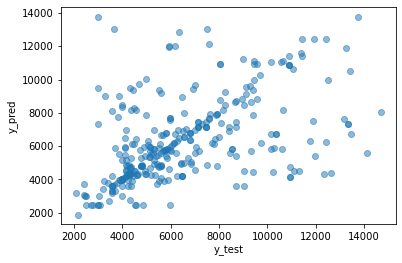

In [95]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [96]:
mean_squared_error(y_test,y_pred)

6662980.154874214

### RMSE

In [97]:
np.sqrt(mean_squared_error(y_test,y_pred))

2581.2749088142887

### r2 Score

In [98]:
r2_score(y_test,y_pred)

0.07607341885337271

### Decision Tree Regressor Model is 76.07%

### In prediction Decision Tree Regressor Model with Price:
###### I had done this prediction by taking Price as an output variable which is continuity in nature so that why I’m using the regression technique.
###### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
###### After calculating adjusted R2 score I used Scatter plot of Decision Tree Regressor Model,MSE,and RMSE I got r2 score of Decision Tree Regressor Model - 76.07%

## RandomForestRegressor

##### Random Forest Regression is a supervised learning algorithm that uses ensemble learning method for regression. Ensemble learning method is a technique that combines predictions from multiple machine learning algorithms to make a more accurate prediction than a single model.

In [99]:
rf = RandomForestRegressor()
rf.fit(x_train,y_train)

RandomForestRegressor()

##### First I have to fit the Training data of RandomForestRegressor.

In [100]:
# adjusted r2 score
rf.score(x_train,y_train)

0.934370038952294

In [101]:
rf.score(x_test,y_test)

0.47759480124421283

In [102]:
y_pred = rf.predict(x_test)
y_pred

array([ 6278.59      ,  7941.925     ,  2951.97      ,  7390.19      ,
        6102.08      ,  5047.21      ,  5437.36      ,  6280.85      ,
        6099.56      ,  6746.55      ,  9136.38      ,  4170.66      ,
        6088.49      ,  4994.89      , 11512.18      ,  4578.13      ,
        2941.93      ,  7313.5       ,  5947.54      ,  5943.63      ,
        5905.45      ,  4521.36      ,  6968.88      ,  3621.28      ,
        7027.45      ,  8416.3       ,  6632.32      ,  6935.82      ,
        5878.41      ,  6874.        ,  5992.98      ,  4143.21      ,
        6243.83      ,  5877.58      ,  2762.47      ,  7333.88      ,
        3071.47      , 10402.38      ,  6342.13      ,  6638.96      ,
        4678.26      ,  4430.76      ,  6129.85      ,  8876.24      ,
        4076.27      ,  4690.7       ,  5203.62      ,  5798.51      ,
        5626.54666667, 11030.18      ,  6799.56      ,  6958.24      ,
        6674.7875    ,  5113.15      ,  6157.23      ,  7861.88766667,
      

#### Scatter plot of Random Forest Regressor Model

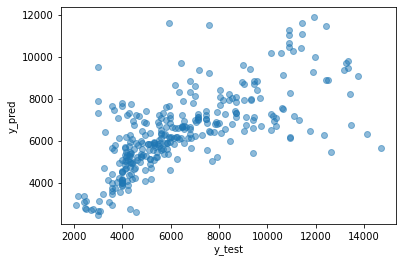

In [103]:
plt.scatter(y_test, y_pred, alpha = 0.5)
plt.xlabel("y_test")
plt.ylabel("y_pred")
plt.show()

### MSE

In [104]:
mean_squared_error(y_test,y_pred)

3767372.3682602113

### RMSE

In [105]:
np.sqrt(mean_squared_error(y_test,y_pred))

1940.9720163516556

### r2 Score

In [106]:
r2_score(y_test,y_pred)

0.47759480124421283

## Random Forest Regressor - 47.75%

#### In prediction Random Forest Regressor with Price:
###### I had done this prediction by taking Price as an output variable which is continuity in nature so that why I’m using the regression technique.¶
###### While calculating the best random state the 370 is best state which providing the highest adjusted R2 score value for this model.
###### After calculating adjusted R2 score I used Scatter plot of Random Forest Regressor,MSE,and RMSE I got r2 score of Random Forest Regressor - 47.75%

# Regularization Method

In [112]:
# lasso regularization

lasscv = LassoCV(alphas = None,cv=10,max_iter=5000,normalize=True)

In [113]:
lasscv.fit(x_train,y_train)

LassoCV(cv=10, max_iter=5000, normalize=True)

In [114]:
# best alphas parameters

alpha = lasscv.alpha_
alpha

0.6599563838883463

In [115]:
# now we have best parameter lets use the lasso regularization

lasso_reg = Lasso(alpha)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.6599563838883463)

In [116]:
lasso_reg.score(x_test,y_test)

0.19299328769726765

###### I have try to improve the accuracy score by using lasso regularization 19.29 but no increase in Accuracy Value

### Saving the Best Model

In [117]:
import pickle

In [118]:
# saving the Decison Tree Regressor Model

filename = 'finalized_model.pickle'
pickle.dump(dt,open(filename,'wb'))

loaded_model = pickle.load(open(filename,'rb'))

#### From the Above Coding I Get best model is Random Forest Accuracy Score.
#### So I will Save the Decison Tree Regressor as the Best Model.

# COCLUSION

#### The overall survey for the dynamic price changes in the flight tickets is presented. This gives the information about the highs and lows in the airfares acording to the days, weekend and time of the day that is morning, evening and night. Also the machine learning models in the computational intelligence feild that are evaluated before on different datasets are studied. Their accuracy and performances are evaluated and compared in order to get better result. For the prediction of the ticket prices perfectly differnt prediction models are tested for the better prediction accuracy. As the pricing models of the company are developed in order to maximize the revenue management. So to get result with maximum accuracy regression analysis is used. From the studies , the feature that influences the prices of the ticket are to be considered. In future the details about number of availble seats can improve the performance of the model.
#### I’ll briefly discuss how I approached this problem of predicting flight price prediction.
#### a) I have flight price prediction dataset from which I had to extract information.
#### b) I have done 1 label as the dataset speaks:
Price
#### c) I had used pandas library to read the Dataset which provide me to explore & visualize the Data properly based on Rows & Columns.
#### d) After from all datasets, I preprocessed the data using replacing all zeros and filling all missing values.
#### e) I did exploratory data analysis on main data frame and tried to see all visualizations.
#### f) Based on visualization knowledge, I use various EDA TECHNIQUES to plot the graphs and Box Plot.
#### g) I use VIF and Standard Scalar to scaled the data and by VIF I make a relationship between Features & Features.
#### h) After from all these i split the Features & Labels into 2 parts.
#### i) On this data, I have applied our machine learning models such as Random Forest Repressor and Decision Tree Regressor According to the above 4 model prediction the best model is Decision Tree Regressor - 76.07%.